In [1]:
# Data Source: https://firemap.sdsc.edu:8443/geoserver/web/

In [167]:
%matplotlib inline
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt

In [168]:
# Creating a numpy array from an image file:

In [180]:
from skimage import data

photo_data = data.rocket()
photo_data = misc.imread('./wifire/sd-3layers.tif')
type(photo_data)

numpy.ndarray

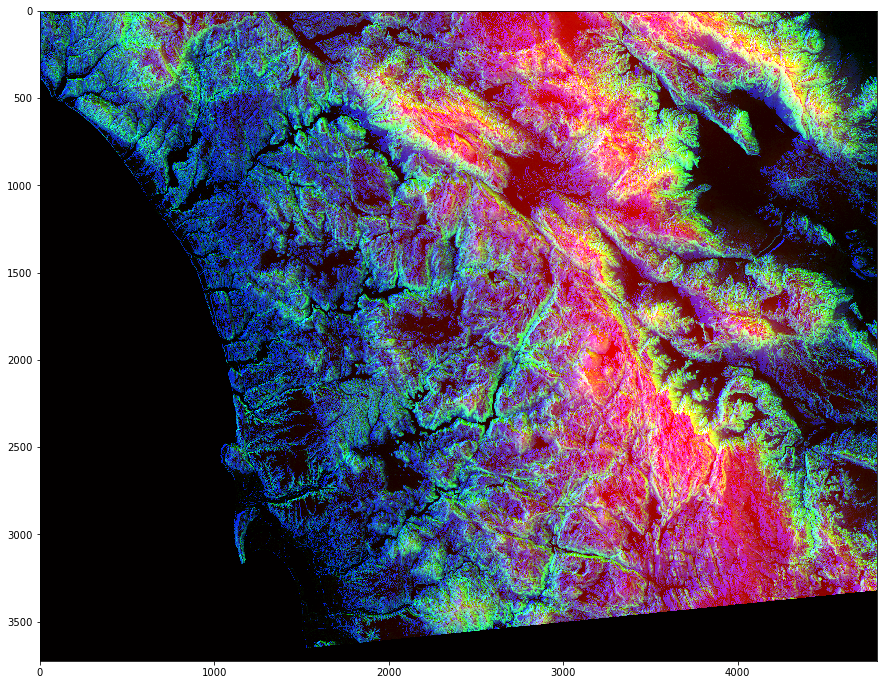

In [181]:
plt.figure(figsize=(15,15))
plt.imshow(photo_data)

In [182]:
photo_data.shape

(3725, 4797, 4)

In [183]:
photo_data.size

71475300

In [184]:
photo_data.min(), photo_data.max()

(0, 255)

In [185]:
photo_data.mean()

120.49201255538627

In [186]:
# Pixel on the 150th row and 250th column
photo_data[150, 250]

array([ 23,  38, 247, 255], dtype=uint8)

In [187]:
# Set to black the pixel on the 3rd row and 10th column
photo_data[150, 250] = 0

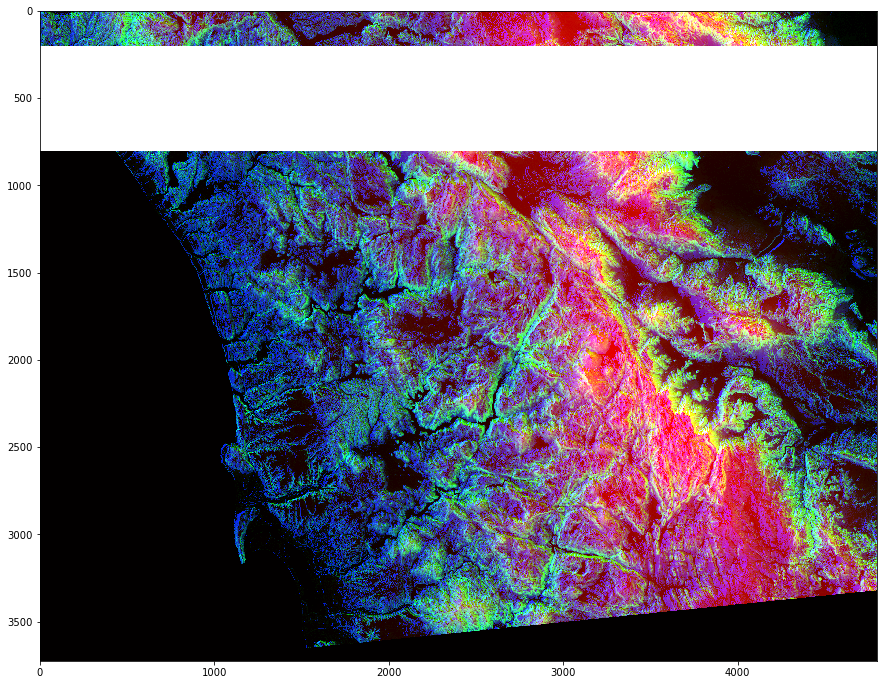

In [188]:
# Set to 0 : all pixels in a range
photo_data[200:800] = 255
plt.figure(figsize=(15,15))
plt.imshow(photo_data)

In [189]:
filter = photo_data < 50

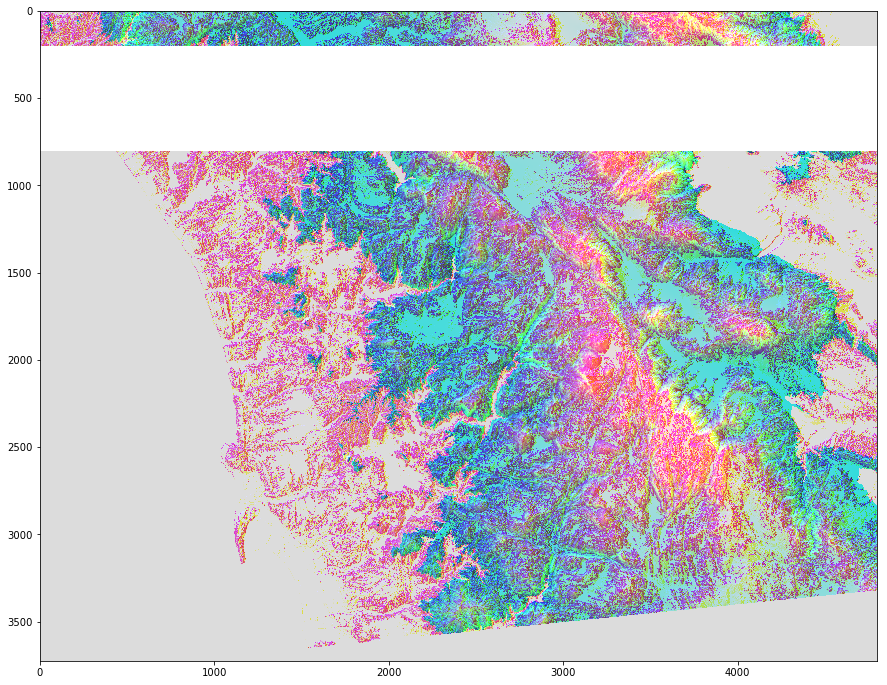

In [190]:
# Whenever the filter is True: set value to a random integer

import random
photo_data[filter] = random.randint(200,255)
plt.figure(figsize=(15,15))
plt.imshow(photo_data)

In [191]:
rows = np.arange(len(photo_data))
cols = (1 * rows) % len(photo_data)

In [192]:
photo_data[rows, cols] = 0

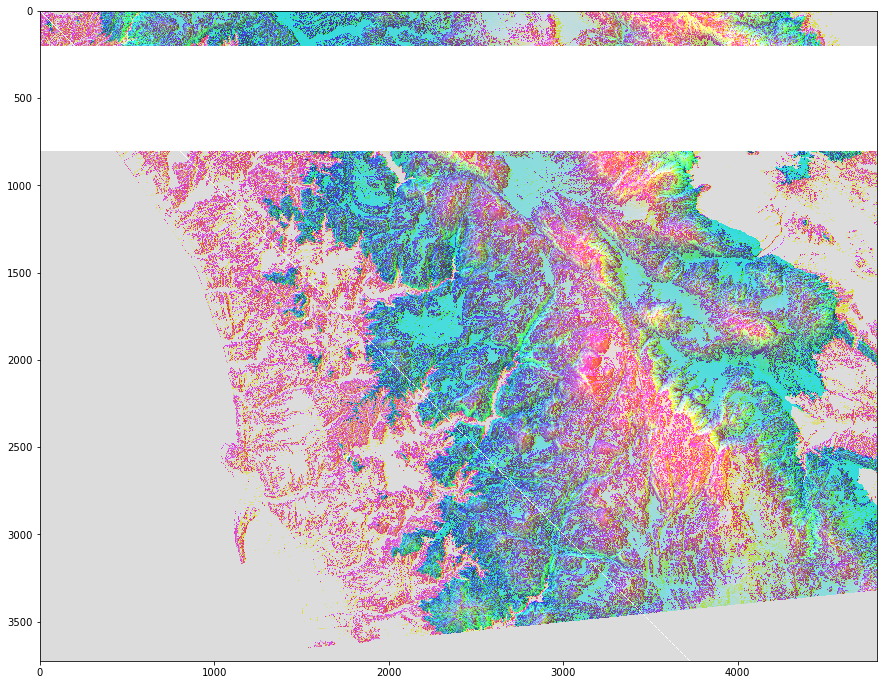

In [193]:
plt.figure(figsize=(15,15))
plt.imshow(photo_data)

In [194]:
totalRows, totalCols, ch = photo_data.shape

X, Y = np.ogrid[:totalRows, :totalCols]

In [195]:
center_row, center_col = totalRows / 2, totalCols / 2

distFromCenter = (X - center_row)**2 + (Y - center_col)**2
radius = (totalRows / 2)**2
circular_filter = (distFromCenter > radius)

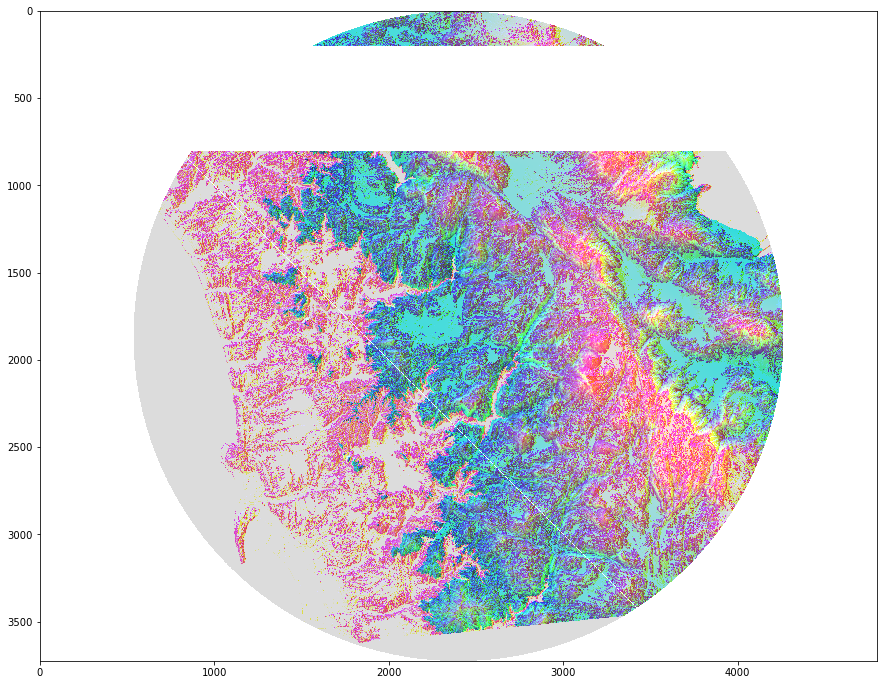

In [196]:
photo_data[circular_filter] = 0
plt.figure(figsize=(15,15))
plt.imshow(photo_data)

In [197]:
X, Y = np.ogrid[:totalRows, :totalCols]
upper_half = X < center_row
upper_half_filter = np.logical_and(upper_half, circular_filter)

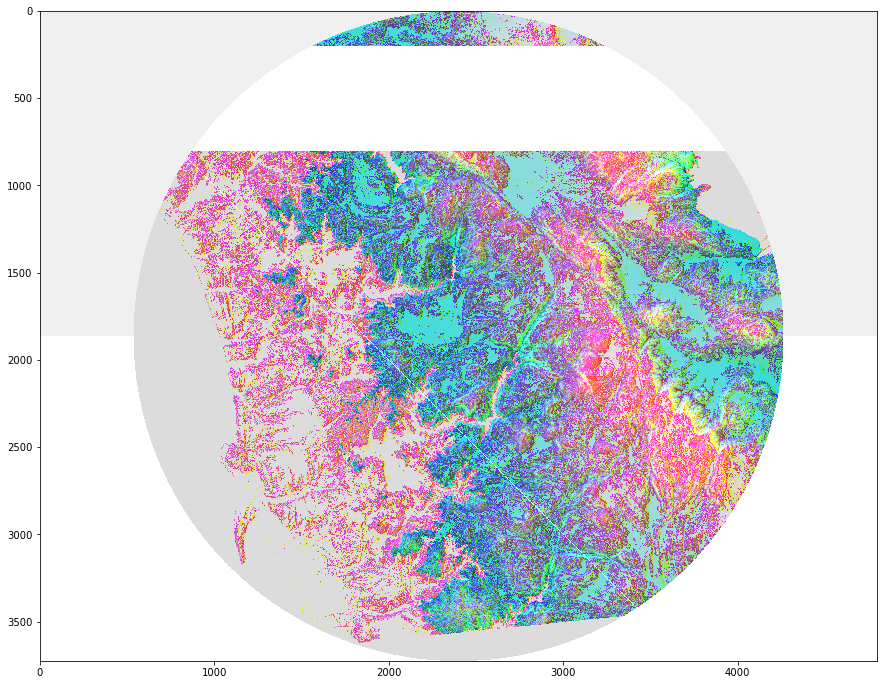

In [199]:
plt.figure(figsize=(15,15))
photo_data[upper_half_filter] = random.randint(200,255)
plt.imshow(photo_data)